# UNIST
## Mathematical Sciences( http://www.math.unist.ac.kr )
### 2015 CMA Summer Workshop : Mathematical Bigdata Analysis

# Reference : IPython Interactive Computing and Visualization Cookbook

https://www.packtpub.com/big-data-and-business-intelligence/ipython-interactive-computing-and-visualization-cookbook

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import pandas.io.data
import datetime

# Logistic Map

In [3]:
def f(a, x):
    """ Logistic Function """
    return a*x*(1-x)

In [4]:
init = x = 0.2
values = np.array(init)
for i in xrange(100):
    x = f(4, x)
    values = np.append(values, x)

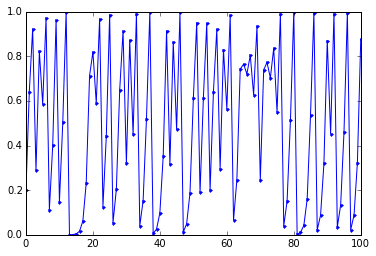

In [5]:
plt.plot(values, '.-')

##### to pandas Series

In [6]:
obj = pd.Series(values)

In [7]:
obj.values[:5]

array([ 0.2       ,  0.64      ,  0.9216    ,  0.28901376,  0.82193923])

In [8]:
obj.index[:5]

Int64Index([0, 1, 2, 3, 4], dtype='int64')

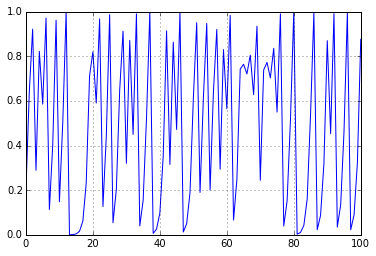

In [9]:
obj.plot()

### Bifurcation of Logistic Map

In [10]:
n = 10000
r = np.linspace(2.5, 4.0, n)

In [11]:
iterations = 1000
last = 100

In [12]:
x = 1e-5 * np.ones(n)

In [13]:
lyapunov = np.zeros(n)

In [14]:
x = f(3, x)

In [15]:
f(3, x)

array([  8.99964001e-05,   8.99964001e-05,   8.99964001e-05, ...,
         8.99964001e-05,   8.99964001e-05,   8.99964001e-05])

In [16]:
r, x

(array([ 2.5       ,  2.50015002,  2.50030003, ...,  3.99969997,
         3.99984998,  4.        ]),
 array([  2.99997000e-05,   2.99997000e-05,   2.99997000e-05, ...,
          2.99997000e-05,   2.99997000e-05,   2.99997000e-05]))

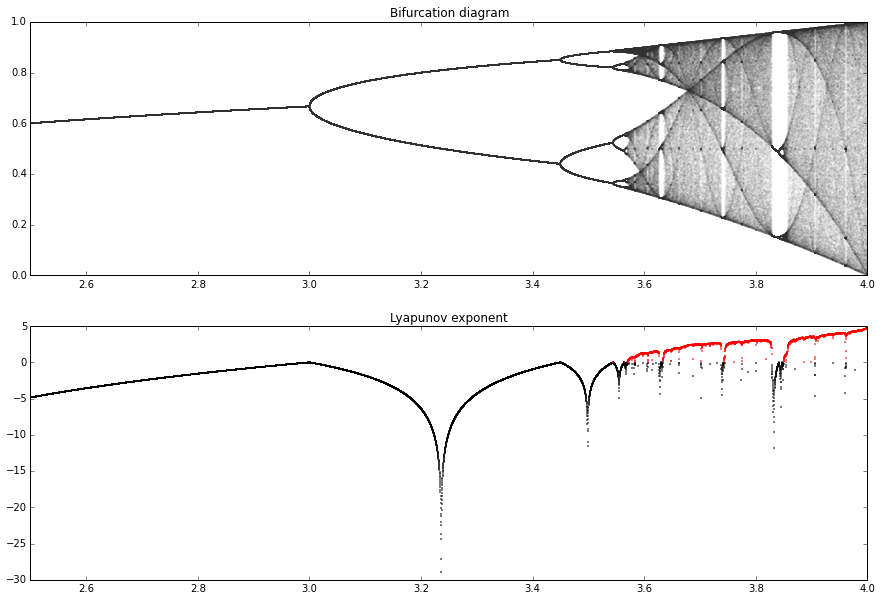

In [23]:
plt.figure(figsize=(15, 10))
plt.subplot(211)
for i in range(iterations):
    x = f(r, x)
    # We compute the partial sum of the
    # Lyapunov exponent.
    lyapunov += np.log(abs(r-2*r*x))
    # We display the bifurcation diagram.
    if i >= (iterations - last):
        plt.plot(r, x, '.k', markersize=1, alpha=.1)
plt.xlim(2.5, 4)
plt.title("Bifurcation diagram")
# We display the Lyapunov exponent.
plt.subplot(212)
plt.plot(r[lyapunov<0], lyapunov[lyapunov<0]/iterations, '.k', markersize=2)
plt.plot(r[lyapunov>=0], lyapunov[lyapunov>=0]/iterations, '.r', markersize=2)
plt.xlim(2.5, 4)
plt.title("Lyapunov exponent")

# Ordinary Differential Equations(ODEs)

$$u''=-\frac{k}{m}u'+g$$

In [24]:
m = 1.
k = 1.
g = 9.81
v0 = np.zeros(4) # initial position is (0, 0)
# The initial speed vector is oriented to the top right
v0[2] = 4.
v0[3] = 10.

In [25]:
def f(v, t0, k):
    # v has four components v=[u, u']
    u, udot = v[:2], v[2:]
    # compute the second derivative u'' of u
    udotdot = -k/m * udot
    udotdot[1] -= g
    # return v'=[u', u'']
    return np.r_[udot, udotdot]

(0, 12)

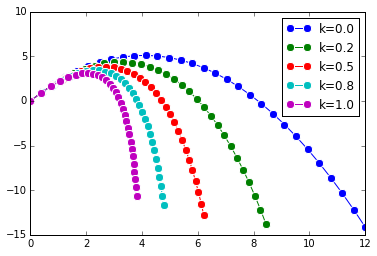

In [26]:
from scipy import integrate

# evaluate the system on 30 linearly spaced times t=[0, 3]
t = np.linspace(0., 3., 30)
# simulate the system for different values of k
for k in np.linspace(0., 1., 5):
    # simulate the system and evaluate v on the given times
    v = integrate.odeint(f, v0, t, args=(k,))
    # plot the particle's trajectory
    plt.plot(v[:,0], v[:,1], 'o-', mew=1, ms=8, mec='w',
             label='k={0:.1f}'.format(k))
plt.legend()
plt.xlim(0, 12)

# Partial Differential Equation(PDEs)
##reaction-diffusion systems and Turing patterns

$$ \frac{\partial u}{\partial t} = a\Delta u + u - u^3 - v + k$$
$$ \tau \frac{\partial u}{\partial t} = b \Delta v + u - v$$
on the domain $E = [-1, 1]^2$

http://ipython-books.github.io/featured-05/

In [274]:
a = 2.8e-4
b = 5e-3
tau = .1
k = -.005

In [275]:
size = 80 #size of the 2D grid
dx = 2./size # space step
T = 10. # total time
dt = .9 * dx**2/2 # time step
n = int(T/dt)

In [276]:
U = np.random.rand(size, size)
V = np.random.rand(size, size)

In [278]:
def laplacian(Z):
    Ztop = Z[0:-2, 1:-1]
    Zleft = Z[1:-1, 0:-2]
    Zbottom = Z[2:, 1:-1]
    Zright = Z[1:-1, 2:]
    Zcenter = Z[1:-1, 1:-1]
    return (Ztop + Zleft + Zbottom + Zright \
           -4 * Zcenter) / dx**2

In [281]:
for i in xrange(n):
    # compute the laplacian of u and v
    deltaU = laplacian(U)
    deltaV = laplacian(V)
    # take the values of u and v
    # inside the grid
    Uc = U[1:-1, 1:-1]
    Vc = V[1:-1, 1:-1]
    # update the variables
    U[1:-1, 1:-1], V[1:-1, 1:-1] = (
        Uc + dt * (a*deltaU + Uc - Uc**3 - Vc + k),
        Vc + dt * (b*deltaV + Uc - Vc) / tau
    )
    # neumann conditions, derivatives at the edges are null
    for Z in (U, V):
        Z[0, :] = Z[1, :]
        Z[-1, :] = Z[-2, :]
        Z[:, 0] = Z[:, 1]
        Z[:, -1] = Z[:, -2]

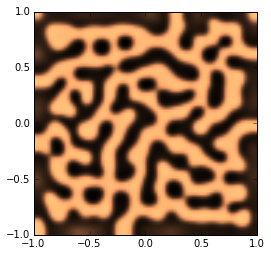

In [291]:
plt.imshow(U, cmap=plt.cm.copper, extent=[-1,1,-1,1])